#### Understand the Problem Statement
Tweets Preprocessing and Cleaning
Data Inspection
Data Cleaning
Story Generation and Visualization from Tweets
Extracting Features from Cleaned Tweets
Bag-of-Words
TF-IDF
Word Embeddings
Model Building: Sentiment Analysis
Logistic Regression
Support Vector Machine
RandomForest
XGBoost
Model Fine-tuning
Summary

In [1]:
#Let’s load the libraries which will used in this course.

import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

In [2]:
pd.set_option("display.max_colwidth", 300) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline

In [3]:
train  = pd.read_csv('train_sentiment.csv') 
test = pd.read_csv('test_sentiment.csv')

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [5]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [6]:
# Data Inspection
# Let us check a few non-racist tweets
train[train.label==0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [7]:
# Data Inspection
# Let us check a few racist tweets
train[train.label==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


In [8]:
# There are so many words and characters which are not really required. will try to keep only those words
# which are important and adds value 
# Let us check the dimensions of train and test datasets
print(train.shape)  #Train seems to have 31962 tweets
print(test.shape)   #Test seems to have 17197 tweets


(31962, 3)
(17197, 2)


In [9]:
# Let us look at label distribution
print(train.label.value_counts())  # 0(non racist)-29720 tweets; 1(racist)-2242 tweets
print(train.label.value_counts(normalize=True))  # 0(non racist)-93% tweets; 1(racist)-7% tweets

# Looks like this is imbalanced classification challenge

0    29720
1     2242
Name: label, dtype: int64
0    0.929854
1    0.070146
Name: label, dtype: float64


In [10]:
# Let us check the distribution of length of tweets both in train and test dat
train_length=train.tweet.str.len()
test_length=test.tweet.str.len()

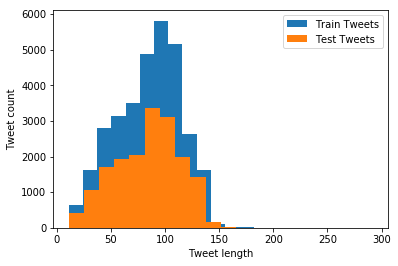

In [11]:
# plot the distributions in the form of histograms
plt.hist(train_length,bins=20,label="Train Tweets")
plt.hist(test_length,bins=20,label="Test Tweets")
plt.xlabel("Tweet length")
plt.ylabel("Tweet count")
plt.legend()
plt.show()

In any natural language processing task, cleaning raw text data is an important step. It helps in getting rid of the unwanted words and characters which helps in obtaining better features. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

Before we begin cleaning, let’s first combine train and test datasets. Combining the datasets will make it convenient for us to preprocess the data. Later we will split it back into train and test data.

In [12]:
combi=train.append(test,ignore_index=True)


C:\Users\sumanth\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [13]:
combi.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation


In [14]:
combi.shape #(49159, 3)

(49159, 3)

In [15]:
# define function to remove unwanted patterns passed as regular expressions

def remove_pattern(tweet,pattern):
    text_matches=re.findall(pattern,tweet)
    for text in text_matches:
        tweet=re.sub(text,"",tweet)
    return tweet     
        
        
    
    
    
    

In [16]:
#Remove twitter handles
combi["tidy_tweet"]=combi.tweet.apply(remove_pattern,args=["@[\w]*"])

In [17]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [18]:
#Removing Punctuations, Numbers, and Special Characters
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [19]:
# Removing short words. words like "hmm","oh" are of little use. Let us get rid of words having length 3 or less. Do 
# this only after careful study and analysis of the data as otherwise we may lose significant info.

combi["tidy_tweet"]=combi["tidy_tweet"].apply(lambda sentence:" ".join([token for token in sentence.split() if len(token)>3]))


In [20]:
combi.tidy_tweet

0                                                            when father dysfunctional selfish drags kids into dysfunction #run
1                                                 thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2                                                                                                           bihday your majesty
3                                                                                                    #model love take with time
4                                                                                                factsguide society #motivation
5                                            huge fare talking before they leave chaos disputes when they there #allshowandnogo
6                                                                                                        camping tomorrow danny
7                next school year year exams think about that #school #exams #hate #imagine #actorslife 

In [21]:
#Text Normalization
combi["tidy_tweet"]=combi["tidy_tweet"].apply(lambda sentence:sentence.split())

In [22]:
combi

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,"[when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]"
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,"[thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]"
2,3,0.0,bihday your majesty,"[bihday, your, majesty]"
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,"[#model, love, take, with, time]"
4,5,0.0,factsguide: society now #motivation,"[factsguide, society, #motivation]"
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,"[huge, fare, talking, before, they, leave, chaos, disputes, when, they, there, #allshowandnogo]"
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,"[camping, tomorrow, danny]"
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,"[next, school, year, year, exams, think, about, that, #school, #exams, #hate, #imagine, #actorslife, #revolutionschool, #girl]"
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,"[love, land, #allin, #cavs, #champions, #cleveland, #clevelandcavaliers]"
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,"[welcome, here]"


In [23]:
tokenized_tweet=combi.tidy_tweet

In [24]:
tokenized_tweet

0                                                             [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1                                                 [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                                                                  [bihday, your, majesty]
3                                                                                                         [#model, love, take, with, time]
4                                                                                                       [factsguide, society, #motivation]
5                                          [huge, fare, talking, before, they, leave, chaos, disputes, when, they, there, #allshowandnogo]
6                                                                                                               [camping, tomorrow, danny]
7           [next, school, 

In [25]:
#let us normalize the tokenized tweets
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda lst:[stemmer.stem(token) for token in lst])


In [26]:
# let us stitch back together all these together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])


In [27]:
combi["tidy_tweet"]=tokenized_tweet

In [28]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [29]:
# Exploring and Visualizing the data
#A. Understanding the common words used in the tweets: word cloud
all_words=" ".join([text for text in combi["tidy_tweet"]])    #series of words across all tweets

In [30]:
from wordcloud import WordCloud

In [31]:
wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110)

In [32]:
wordcloud=wordcloud.generate(all_words)

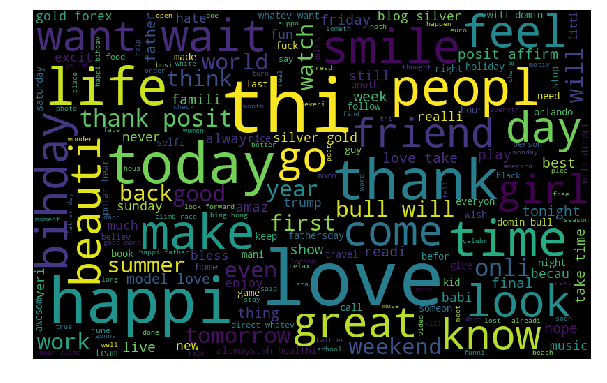

In [33]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

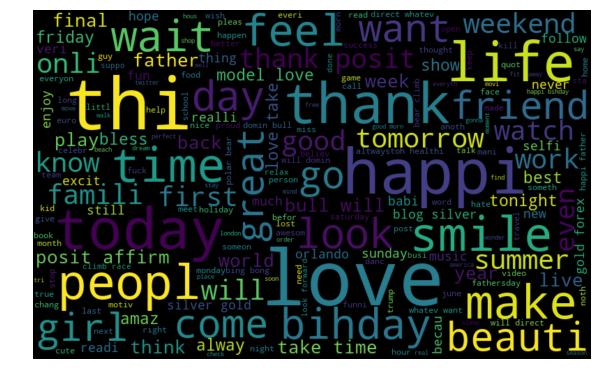

In [34]:
# Words in non racist/sexist tweets
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

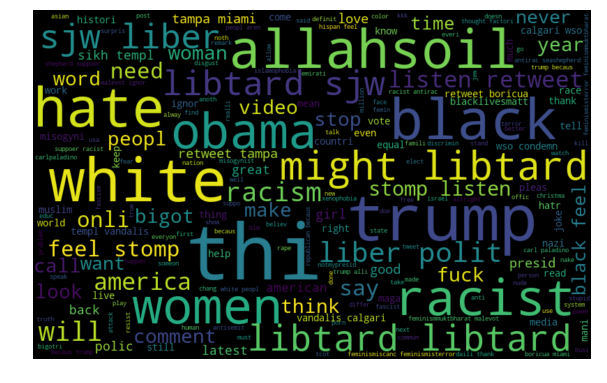

In [35]:
# Words in racist/sexist tweets
negative_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

In [36]:
#D) Understanding the impact of Hashtags on tweets sentiment

#We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other 
#racist/sexist tweets.
#function to collect hashtags


def extract_hashtags(tweets):
    hashtags=[]
    print(tweets.size)
    for i in range(tweets.size):        
        tweet_hashtags=re.findall(r"#(\w+)",tweets[i])
        if tweet_hashtags:
            hashtags.append(tweet_hashtags)  
    return hashtags
    

In [37]:
combi['tidy_tweet'][combi['label'] == 0].values

array(['when father dysfunct selfish drag kid into dysfunct #run',
       'thank #lyft credit caus they offer wheelchair van #disapoint #getthank',
       'bihday your majesti', ...,
       'nina turner airwav tri wrap herself mantl genuin hero like shirley chisolm #shame #imwithh',
       'listen song monday morn work', 'thank follow'], dtype=object)

In [41]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = extract_hashtags(combi['tidy_tweet'][combi['label'] == 0].values)
# extracting hashtags from racist/sexist tweets
HT_negative = extract_hashtags(combi['tidy_tweet'][combi['label'] == 1].values)

29720
2242


In [39]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [42]:
print(HT_regular)

[['run'], ['lyft', 'disapoint', 'getthank'], ['model'], ['motiv'], ['allshowandnogo'], ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'], ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'], ['ireland', 'blog', 'silver', 'gold', 'forex'], ['orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love'], ['gettingf'], ['got', 'junior', 'yugyoem', 'omg'], ['thank', 'posit'], ['friday', 'cooki'], ['euro'], ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'], ['wine', 'weekend'], ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'], ['upsideofflorida', 'shopalyssa', 'love'], ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'], ['ica'], ['rip', 'orlando'], ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'], ['goodnight', 'badmonday'], ['taylorswift'], ['travelingram', 'dalat', 'ripinkylif'], ['photoshop', 'enoughisenough', 'dontphotoshopeveryth', 'wheresallthen

In [43]:
print(HT_negative)

[['cnn', 'michigan', 'tcot'], ['australia', 'opkillingbay', 'seashepherd', 'helpcovedolphin', 'thecov', 'helpcovedolphin'], ['neverump', 'xenophobia'], ['love', 'peac'], ['race', 'ident', 'med'], ['altright', 'whitesupremaci'], ['linguist', 'race', 'power', 'raciolinguist'], ['brexit'], ['peopl', 'trump', 'republican'], ['michelleobama'], ['knick', 'golf'], ['jewishsupremacist'], ['libtard', 'sjw', 'liber', 'polit'], ['trash', 'hate'], ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'], ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'], ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'], ['nazi', 'hatr', 'bigotri'], ['libtard', 'sjw', 'liber', 'polit'], ['fyi', 'tcot'], ['topoli'], ['blacklivesmatt'], ['ushistori', 'eugen'], ['biher', 'bigotri', 'altright', 'potu', 'theresist'], ['crime', 'offic'], ['black', 'retweet', 'tampa', 'miami'], ['allahsoil'], ['prais', 'cleveland', 'rnc', 'white', 'tamirric', 'rip'], ['bigot'], ['blacklivesmatt'], ['feminismiscanc', 'feminismisterror'

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

In [44]:
#Un-nesting lists
from itertools import chain        #flatten list of lists into a single iterable
HT_regular=list(chain.from_iterable(HT_regular))  #convert that iterable to a list
HT_negative=list(chain.from_iterable(HT_negative))  #convert that iterable to a list

In [45]:
#frequency distributions of the lists
regular_dict=nltk.FreqDist(HT_regular)
regular_dict

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [46]:
regular_tags=regular_dict.keys()
regular_tag_counts=regular_dict.values()
print(regular_tags)
print(regular_tag_counts)

dict_keys(['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love', 'gettingf', 'got', 'junior', 'yugyoem', 'omg', 'thank', 'posit', 'friday', 'cooki', 'euro', 'badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh', 'wine', 'weekend', 'tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssa', 'smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback', 'ica', 'rip', 'alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift', 'travelingram', 'dalat', 'ripinkylif', 'photoshop', 'enoughisenough', 'dontphotoshopeveryth', 'wheresallthenaturalphoto', 'cedarpoint', 'bookworm', 'ontothenextnovel', 

In [47]:
d={"hashtags":list(regular_tags),"counts":list(regular_tag_counts)}

In [48]:
df_reg=pd.DataFrame(d)

In [49]:
df_reg_top20=df_reg.nlargest(20,"counts")  #select 20 most frequent hashtags
df_reg_top20

,hashtags,counts
32,love,1654
39,posit,917
58,smile,676
157,healthi,573
38,thank,534
176,fun,463
343,life,425
92,affirm,423
286,summer,390
4,model,375


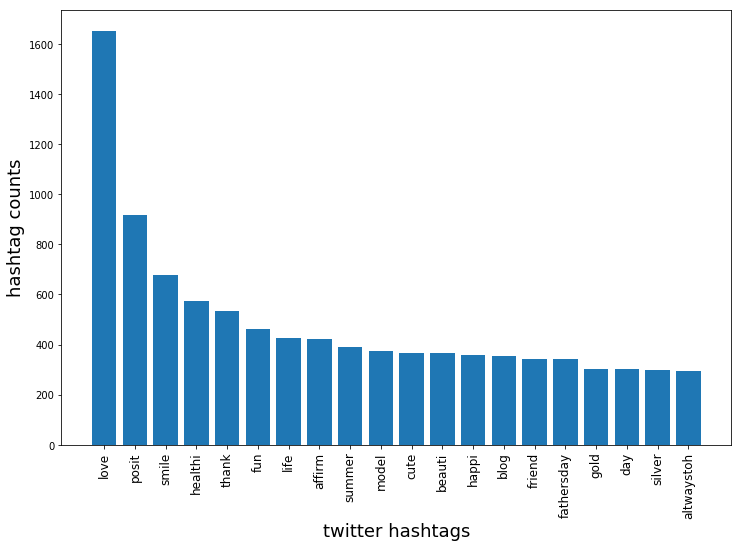

In [50]:
plt.figure(figsize=(12,8))
plt.bar(df_reg_top20.hashtags,df_reg_top20.counts)
plt.xticks(rotation="vertical",fontsize=12)
plt.xlabel("twitter hashtags",fontsize=18)
plt.ylabel("hashtag counts",fontsize=18)
plt.show()


All the above hashtags are positive and it makes sense. Let us check most frequent terms appearing in sexist/racy tweets

In [51]:
#frequency distributions of the lists
negative_dict=nltk.FreqDist(HT_negative)
negative_dict

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [52]:
negative_tags=negative_dict.keys()
negative_tag_counts=negative_dict.values()
print(negative_tags)
print(negative_tag_counts)

dict_keys(['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphin', 'thecov', 'neverump', 'xenophobia', 'love', 'peac', 'race', 'ident', 'med', 'altright', 'whitesupremaci', 'linguist', 'power', 'raciolinguist', 'brexit', 'peopl', 'trump', 'republican', 'michelleobama', 'knick', 'golf', 'jewishsupremacist', 'libtard', 'sjw', 'liber', 'polit', 'trash', 'hate', 'stereotyp', 'prejudic', 'hope', 'conflict', 'pol', 'bluelivesmatt', 'draintheswamp', 'ferguson', 'antisemit', 'hocoschool', 'columbiamd', 'hocomd', 'nazi', 'hatr', 'bigotri', 'fyi', 'topoli', 'blacklivesmatt', 'ushistori', 'eugen', 'biher', 'potu', 'theresist', 'crime', 'offic', 'black', 'retweet', 'tampa', 'miami', 'allahsoil', 'prais', 'cleveland', 'rnc', 'white', 'tamirric', 'rip', 'bigot', 'feminismiscanc', 'feminismisterror', 'feminismmuktbharat', 'malevot', 'prowar', 'anti', 'islam', 'homophob', 'rapist', 'hypocrit', 'latesnew', 'dumptrump', 'lifelesson', 'blogpost', 'whitepeopl', 'respect',

In [53]:
n={"hashtags":list(negative_tags),"counts":list(negative_tag_counts)}

In [54]:
df_neg=pd.DataFrame(n)

In [55]:
df_neg

,hashtags,counts
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


In [56]:
df_neg_top20=df_neg.nlargest(20,"counts")  #select 20 most frequent hashtags
df_neg_top20

,hashtags,counts
22,trump,136
31,polit,95
63,allahsoil,92
30,liber,81
28,libtard,77
29,sjw,75
60,retweet,63
59,black,46
62,miami,46
33,hate,37


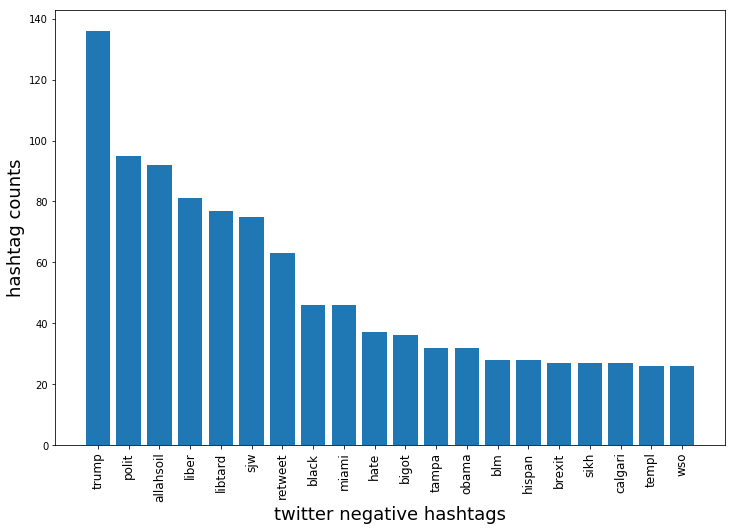

In [57]:
plt.figure(figsize=(12,8))
plt.bar(df_neg_top20.hashtags,df_neg_top20.counts)
plt.xticks(rotation="vertical",fontsize=12)
plt.xlabel("twitter negative hashtags",fontsize=18)
plt.ylabel("hashtag counts",fontsize=18)
plt.show()

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

In [59]:
# Bag of Words Features
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [63]:
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words="english")


In [64]:
bow_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=1000, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [65]:
bow=bow_vectorizer.fit_transform(combi["tidy_tweet"])
bow.shape

(49159, 1000)

This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)

IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

TF-IDF = TF*IDF

In [70]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet']) 
tfidf.shape

(49159, 1000)

We are done with pre-modelling stages required to get the data in proper form and shape. Let us use the following algorithms to build models:

1. Logistic Regression
2. Support Vector machine
3. Random Forest
4. XGBoost

Evaluation metrics:
F1 score is being used as the evaluation metric. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems.

The important components of F1 score are:

True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.
True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.
False Positives (FP) – When actual class is no and predicted class is yes.
False Negatives (FN) – When actual class is yes but predicted class in no.

Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2(Recall Precision) / (Recall + Precision)

In [71]:
# Let us try Logistic regression model on Bag-of-Words(BOW) features
# Extracting train and test BoW features
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [72]:
train_bow


<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 124625 stored elements in Compressed Sparse Row format>

In [74]:
# splitting data into training and validation 
from sklearn.model_selection import train_test_split
xtrain_bow, xvalid_bow, ytrain, yvalid =train_test_split(train_bow,train["label"],random_state=42,test_size=0.3)

In [76]:
from sklearn.linear_model import LogisticRegression
lreg= LogisticRegression() 

In [78]:
#train the model
lreg.fit(xtrain_bow,ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
prediction=lreg.predict_proba(xvalid_bow) #predicting on validation set

In [83]:
prediction_int=prediction[:,1]>=0.3 #if prediction is greater than and equal to 0.3 then 1 else 0

In [84]:
prediction_int=prediction_int.astype(int)

In [87]:
prediction_int

array([0, 0, 0, ..., 0, 1, 0])

In [89]:
#calculate F1 score for the validation set
from sklearn.metrics import f1_score
f1_score(yvalid,prediction_int)

0.5307820299500832

In [90]:
#Now let’s make predictions for the test dataset and create a submission file.
test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int 
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [91]:
submission

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
5,31968,0
6,31969,0
7,31970,0
8,31971,0
9,31972,0


#now, let us follow the same procedue for TFI-DF as well

In [92]:
# splitting data into training and validation 
# Extracting train and test TFI-DF features
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid =train_test_split(train_tfidf,train["label"],random_state=42,test_size=0.3)

In [93]:
lreg.fit(xtrain_tfidf, ytrain) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5446507515473032